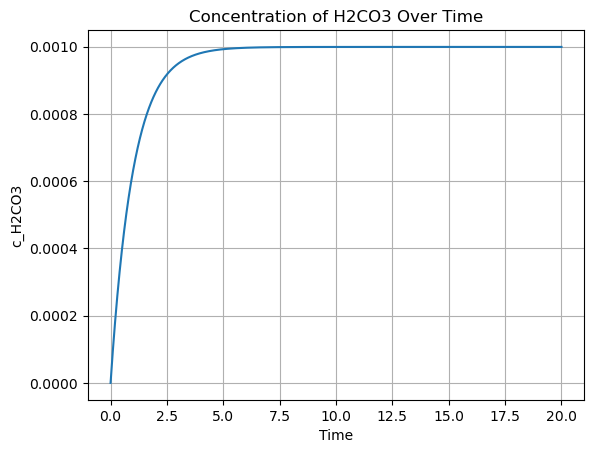

In [10]:
# CO2 is soluble in water, which it may further react with to form carbonic
# acid:
# CO_2 + H_2O k_1-><-k_2 H_2CO_3

# We will consider a really small system where we have just N_{CO_2} =
# 10000 molecules of CO_2, but “infinitely” many H_2O molecules. We start
# with no carbonic acid. The rate of the forward reaction is

# R→ = k_1*N_{CO_2}

# and backward reaction

# R← = k_2*N_{H_2CO_3}

# where k_1 = 10^−3 and k_2 = 1.0.

# If we had an infinite number of molecules, the concentration c would
# follow the ODEs

# dc_{CO_2}(t)/dt = −k_1*c_{CO_2}(t) + k_2*c_{H_2CO_3}(t)

# dc_{H_2CO_3}(t)/dt = −k_1*c_{CO_2}(t) - k_2*c_{H_2CO_3}(t)

# Simulate and plot the above ODEs with c_{CO_2}(0) = 1 and
# c_{H_2CO_3}(0) = 0 for t ∈ [0, 20] using any method you wish and plot
# c_{H_2CO_3} (t).

# a

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
k1 = 1e-3
k2 = 1.0
N_CO2 = 10000

# ODE system
def ode_system(c, t):
    c_CO2, c_H2CO3 = c
    dc_CO2_dt = -k1 * c_CO2 + k2 * c_H2CO3
    dc_H2CO3_dt = k1 * c_CO2 - k2 * c_H2CO3
    return [dc_CO2_dt, dc_H2CO3_dt]

# Initial conditions
c_CO2_0 = 1.0
c_H2CO3_0 = 0.0
initial_conditions = [c_CO2_0, c_H2CO3_0]

# Time points for simulation
t = np.linspace(0, 20, 1000)

# Solve the ODEs
solution = odeint(ode_system, initial_conditions, t)

# Extract the concentration of H2CO3
c_H2CO3 = solution[:, 1]

# Plot the concentration of H2CO3
plt.plot(t, c_H2CO3)
plt.xlabel('Time')
plt.ylabel('c_H2CO3')
plt.title('Concentration of H2CO3 Over Time')
plt.grid()
plt.show()



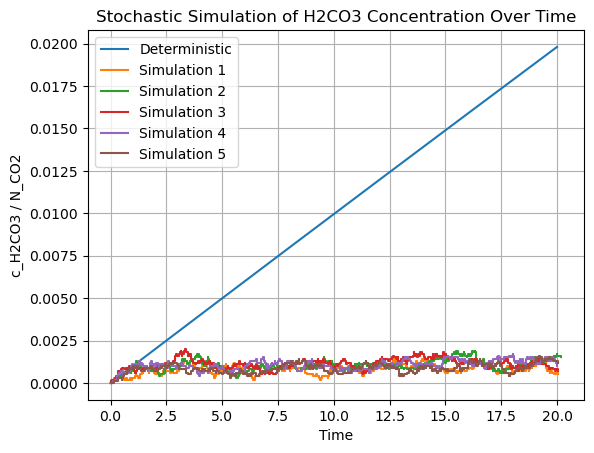

In [11]:
# For smaller systems, such as N = 10000 there will be a lot of noise. To
# simulate this we will use the Gillespie method.

# Simulate the system five times using the Gillespie algorithm
# and plot N_{H_2CO_3}(t)/10000 in the same plot as c_{H_2CO_3}(t). Use
# plt.step(..., where=’post’) to make the plot.

# b
import numpy as np
import matplotlib.pyplot as plt

# Constants
k1 = 1e-3
k2 = 1.0
N_CO2 = 10000
num_simulations = 5

# Function to perform a Gillespie simulation
def gillespie_simulation(N_CO2, k1, k2, t_max):
    t = 0
    c_CO2 = N_CO2
    c_H2CO3 = 0
    time_points = [t]
    h2co3_concentrations = [c_H2CO3 / N_CO2]

    while t < t_max:
        rates = [k1 * c_CO2, k2 * c_H2CO3]
        total_rate = sum(rates)
        dt = np.random.exponential(1 / total_rate)
        event = np.random.choice([0, 1], p=[rates[0] / total_rate, rates[1] / total_rate])

        if event == 0:
            c_CO2 -= 1
            c_H2CO3 += 1
        else:
            c_CO2 += 1
            c_H2CO3 -= 1

        t += dt
        time_points.append(t)
        h2co3_concentrations.append(c_H2CO3 / N_CO2)

    return time_points, h2co3_concentrations

# Time points for simulation
t_max = 20
timesteps = 1000
t = np.linspace(0, t_max, timesteps)

# Perform Gillespie simulations
simulations = [gillespie_simulation(N_CO2, k1, k2, t_max) for _ in range(num_simulations)]

# Plot deterministic solution
c_CO2_deterministic = np.exp(-k1 * t)
c_H2CO3_deterministic = 1 - c_CO2_deterministic
plt.plot(t, c_H2CO3_deterministic, label='Deterministic')

# Plot Gillespie simulations
for i, (time_points, h2co3_concentrations) in enumerate(simulations):
    plt.step(time_points, h2co3_concentrations, where='post', label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('c_H2CO3 / N_CO2')
plt.title('Stochastic Simulation of H2CO3 Concentration Over Time')
plt.legend()
plt.grid()
plt.show()
